<div class="alert alert-block alert-info">
Author:<br>Felix Gonzalez, P.E. <br> Adjunct Instructor, <br> Division of Professional Studies <br> Computer Science and Electrical Engineering <br> University of Maryland Baltimore County <br> fgonzale@umbc.edu
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

This notebook provides an overview of various Python Pandas functions used for obtaining information of a dataframe, data analysis and data transformation. This notebook continues to build on the previous notebooks and introduces various functions such as the .info(), .describe(), .hist(), .unique(), .sort_values(), .groupby(), and pivot_tables.

This notebook also includes discussion on Categorical data, one-hot-encoding, dummy data and dummy data trap. It will also discuss converting categorical data to one-hot-encoding and dummy data. 

Documentation References:
- https://pandas.pydata.org/
- https://pandas.pydata.org/docs/user_guide/index.html

# Table of Contents
[Data Loading](#Data-Loading)

[Dataframe Information](#Dataframe-Information)

[Dataframe Statistics](#Dataframe-Statistics)

[Numerical Features Statistics and Plots](#Numerical-Features-Statistics-and-Plots)

[Unique Values](#Unique-Values)

[Group By](#Group-By)

[Categorical Data](#Categorical-Data)

[Pivot Table](#Pivot-Table)

[Melt Function](#Melt-Function)

[Shift Index/Data](#Shift-Index/Data)

# Data Loading
[Return to Table of Contents](#Table-of-Contents)

The following dataset is from https://www.kaggle.com/datasets/aephidayatuloh/nyc-flights-2013?select=nyc_flights.csv. The data used in this example has the following features/columns.
- year, month, day Date of departure.
- dep_time, arr_time Actual departure and arrival times (format HHMM or HMM), local tz.
- sched_dep_time, sched_arr_time Scheduled departure and arrival times (format HHMM or HMM),
- local tz.
- dep_delay, arr_delay Departure and arrival delays, in minutes. Negative times represent early departures/arrivals.
- carrier Two letter carrier abbreviation. 
- flight Flight number.
- tailnum identification number of an aircraft painted on its tail
- origin, dest Origin and destination.
- air_time Amount of time spent in the air, in minutes.
- distance Distance between airports, in miles.
- hour, minute Time of scheduled departure broken into hour and minutes.
- time_hour Scheduled date and hour of the flight as a POSIXct date.
To reduce the file size to less than 25MB, the data removed the carrier B6 and WN. The full CSV file can be found under Lecture06/input_data/df_flights.zip.

In [2]:
df_flights = pd.read_csv('./input_data/nyc_flights_small.csv')

In [3]:
df_flights.head() # Shows the first rows of dataframe

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
4,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01T10:00:00Z


In [4]:
df_flights.tail() # Shows the last rows of dataframe

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
269861,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z
269862,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z
269863,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z
269864,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z
269865,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40,2013-09-30T12:00:00Z


# Dataframe Information
[Return to Table of Contents](#Table-of-Contents)

There are various functions that we can use to obtain various high level statistics on the dataframe. This includes how many rows, columns, data type of the columns, and number of non-null (or null values).

In [5]:
# Display the index
df_flights.index

RangeIndex(start=0, stop=269866, step=1)

In [6]:
df_flights.shape # Dataframe number of rows and columns

(269866, 19)

In [7]:
# Recall that we can call individual values of the .shape output.
print(f'The dataframe has {df_flights.shape[0]} rows of data and {df_flights.shape[1]} columns.')

The dataframe has 269866 rows of data and 19 columns.


In [8]:
len(df_flights) # Dataframe number of rows using the len function.

269866

In [9]:
# Display the columns
df_flights.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')

In [10]:
# Convert the Columns to a dataframe:
df_columns = list(df_flights.columns.values)
df_columns_index = pd.DataFrame(df_columns, columns = ['column'])
# If all columns are not showing in the df_columns_index you can change the max_rows to None. Uncomment line below.
#pd.set_option('display.max_rows', None) 
# To reset to the default value see next cell.
df_columns_index

,column
0,year
1,month
2,day
3,dep_time
4,sched_dep_time
5,dep_delay
6,arr_time
7,sched_arr_time
8,arr_delay
9,carrier


In [11]:
#pd.reset_option('max_columns') 

In [12]:
# Number of columns using the len and the .columns function.
len(df_flights.columns)

19

In [13]:
df_flights.dtypes # dtypes provides the datatypes for each feature/column

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
dtype: object

In [14]:
df_flights.info() # .info() function provides information on column data # (i.e., index), range of entries, nulls, dtypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269866 entries, 0 to 269865
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            269866 non-null  int64  
 1   month           269866 non-null  int64  
 2   day             269866 non-null  int64  
 3   dep_time        262269 non-null  float64
 4   sched_dep_time  269866 non-null  int64  
 5   dep_delay       262269 non-null  float64
 6   arr_time        261851 non-null  float64
 7   sched_arr_time  269866 non-null  int64  
 8   arr_delay       261253 non-null  float64
 9   carrier         269866 non-null  object 
 10  flight          269866 non-null  int64  
 11  tailnum         267384 non-null  object 
 12  origin          269866 non-null  object 
 13  dest            269866 non-null  object 
 14  air_time        261253 non-null  float64
 15  distance        269866 non-null  int64  
 16  hour            269866 non-null  int64  
 17  minute    

# Dataframe Statistics
[Return to Table of Contents](#Table-of-Contents)

When analyzing data we are interested in calculating statistics that may provide some insights in the data. Common statistics include number of records (or rows), mean, standard deviation, minimum and maximum values, percentiles, etc.). There are various ways to calculate these statistics using the describe() function or calculating the statisticis individually.

Documentation References:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [15]:
# describe() shows a quick statistic summary of your data
df_flights.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,269866.0,269866.000000,269866.000000,262269.000000,269866.000000,262269.000000,261851.000000,269866.000000,261253.000000,269866.000000,261253.000000,269866.000000,269866.000000,269866.000000
mean,2013.0,6.549765,15.700918,1345.705467,1337.364503,12.326169,1524.674743,1553.849355,6.238267,2258.231378,150.716864,1036.085565,13.118166,25.547898
std,0.0,3.412419,8.758484,473.840667,454.876645,40.388480,507.724006,471.544085,44.865909,1656.659470,95.880359,750.164789,4.542258,19.375001
min,2013.0,1.000000,1.000000,1.000000,106.000000,-33.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,909.000000,905.000000,-5.000000,1118.000000,1135.000000,-17.000000,771.000000,81.000000,502.000000,9.000000,5.000000
50%,2013.0,7.000000,16.000000,1407.000000,1400.000000,-2.000000,1551.000000,1608.000000,-5.000000,1787.000000,124.000000,762.000000,14.000000,27.000000
75%,2013.0,10.000000,23.000000,1735.000000,1720.000000,10.000000,1945.000000,1949.000000,13.000000,3823.000000,193.000000,1389.000000,17.000000,42.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [16]:
# Recall the transposing of dataframes may improve the visualization.
df_flights.describe().T

,count,mean,std,min,25%,50%,75%,max
year,269866.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0
month,269866.0,6.549765,3.412419,1.0,4.0,7.0,10.0,12.0
day,269866.0,15.700918,8.758484,1.0,8.0,16.0,23.0,31.0
dep_time,262269.0,1345.705467,473.840667,1.0,909.0,1407.0,1735.0,2400.0
sched_dep_time,269866.0,1337.364503,454.876645,106.0,905.0,1400.0,1720.0,2359.0
dep_delay,262269.0,12.326169,40.388480,-33.0,-5.0,-2.0,10.0,1301.0
arr_time,261851.0,1524.674743,507.724006,1.0,1118.0,1551.0,1945.0,2400.0
sched_arr_time,269866.0,1553.849355,471.544085,1.0,1135.0,1608.0,1949.0,2359.0
arr_delay,261253.0,6.238267,44.865909,-86.0,-17.0,-5.0,13.0,1272.0
flight,269866.0,2258.231378,1656.659470,1.0,771.0,1787.0,3823.0,8500.0


In [17]:
#By default, describe() applies to numeric columns. To expand to other types,
df_flights.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
year,269866.0,NaN,NaN,NaN,2013.0,0.0,2013.0,2013.0,2013.0,2013.0,2013.0
month,269866.0,NaN,NaN,NaN,6.549765,3.412419,1.0,4.0,7.0,10.0,12.0
day,269866.0,NaN,NaN,NaN,15.700918,8.758484,1.0,8.0,16.0,23.0,31.0
dep_time,262269.0,NaN,NaN,NaN,1345.705467,473.840667,1.0,909.0,1407.0,1735.0,2400.0
sched_dep_time,269866.0,NaN,NaN,NaN,1337.364503,454.876645,106.0,905.0,1400.0,1720.0,2359.0
dep_delay,262269.0,NaN,NaN,NaN,12.326169,40.38848,-33.0,-5.0,-2.0,10.0,1301.0
arr_time,261851.0,NaN,NaN,NaN,1524.674743,507.724006,1.0,1118.0,1551.0,1945.0,2400.0
sched_arr_time,269866.0,NaN,NaN,NaN,1553.849355,471.544085,1.0,1135.0,1608.0,1949.0,2359.0
arr_delay,261253.0,NaN,NaN,NaN,6.238267,44.865909,-86.0,-17.0,-5.0,13.0,1272.0
carrier,269866,14,UA,58665,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#the result might be messy (since describe outputs different results for numberical versus object). Let's try
df_flights.describe(include='object')

,carrier,tailnum,origin,dest,time_hour
count,269866,267384,269866,269866,269866
unique,14,3268,3,96,6415
top,UA,N725MQ,EWR,ATL,2013-09-13T12:00:00Z
freq,58665,575,108090,17156,82


In [19]:
# Performing a descriptive statistic: .mean() calculates he average of specified column
df_flights['dep_delay'].mean()

12.326168933423316

In [20]:
# Mean for multiple columns.
df_flights[['dep_delay', 'arr_delay']].mean()

dep_delay    12.326169
arr_delay     6.238267
dtype: float64

In [21]:
# Average of numeric rows (simply by setting axis to 1)
df_flights.mean(axis = 1) # Note warning (future error) due to numeric_only columns.

C:\Users\felix\AppData\Local\Temp\ipykernel_24868\293400554.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_flights.mean(axis = 1) # Note warning (future error) due to numeric_only columns.


0          564.357143
1          583.714286
2          524.285714
3          438.000000
4          516.500000
             ...     
269861     979.555556
269862    1145.444444
269863     982.111111
269864     957.333333
269865     880.222222
Length: 269866, dtype: float64

In [22]:
df_flights.mean(axis = 1, numeric_only = True) # Note that this not necesarily makes sense in all cases.
# In this case it does not make sense to calculate the mean of times with delays.

0          564.357143
1          583.714286
2          524.285714
3          438.000000
4          516.500000
             ...     
269861     979.555556
269862    1145.444444
269863     982.111111
269864     957.333333
269865     880.222222
Length: 269866, dtype: float64

In [23]:
# Average of rows of specific columns
df_flights[['dep_delay', 'arr_delay']].mean(axis = 1)
# Calculating the mean of these two columns may or may not make sense within a subject matter expert or a domain.

0          6.5
1         12.0
2         17.5
3        -15.5
4          4.0
          ... 
269861     NaN
269862     NaN
269863     NaN
269864     NaN
269865     NaN
Length: 269866, dtype: float64

In [24]:
# The value_counts() function allows to do a count of categorical-like data.
df_flights['carrier'].value_counts()

UA    58665
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: carrier, dtype: int64

In [25]:
df_flights[['origin', 'dest']].value_counts()

origin  dest
LGA     ATL     10204
JFK     LAX      9574
LGA     ORD      8857
JFK     SFO      7169
LGA     CLT      6168
                ...  
JFK     MEM         1
        STL         1
LGA     LEX         1
JFK     SJC         1
EWR     LGA         1
Length: 206, dtype: int64

In [26]:
# The outputs of value_counts() can be converted to a dataframe with the .to_frame() function.
df_flights[['origin', 'dest']].value_counts().to_frame('counts')

counts
origin dest        
LGA    ATL    10204
JFK    LAX     9574
LGA    ORD     8857
JFK    SFO     7169
LGA    CLT     6168
...             ...
JFK    MEM        1
       STL        1
LGA    LEX        1
JFK    SJC        1
EWR    LGA        1

[206 rows x 1 columns]

# Numerical Features Statistics and Plots
[Return to Table of Contents](#Table-of-Contents)


There are a few ways to explore the feature statistics in order to identify trends, relationships, outliers, evaluate features to clean, etc. As previously discussed .describe() provides statistics. The .hist() and sns.pairplot() provides various plots of the different featuers and can be helpful to explore relationships. 

SNS Pairplot documentation at: https://seaborn.pydata.org/generated/seaborn.pairplot.html. Other examples of SNS plots to explore relationship between features is discussed at the following reference: https://towardsdatascience.com/14-data-visualization-plots-of-seaborn-14a7bdd16cd7.

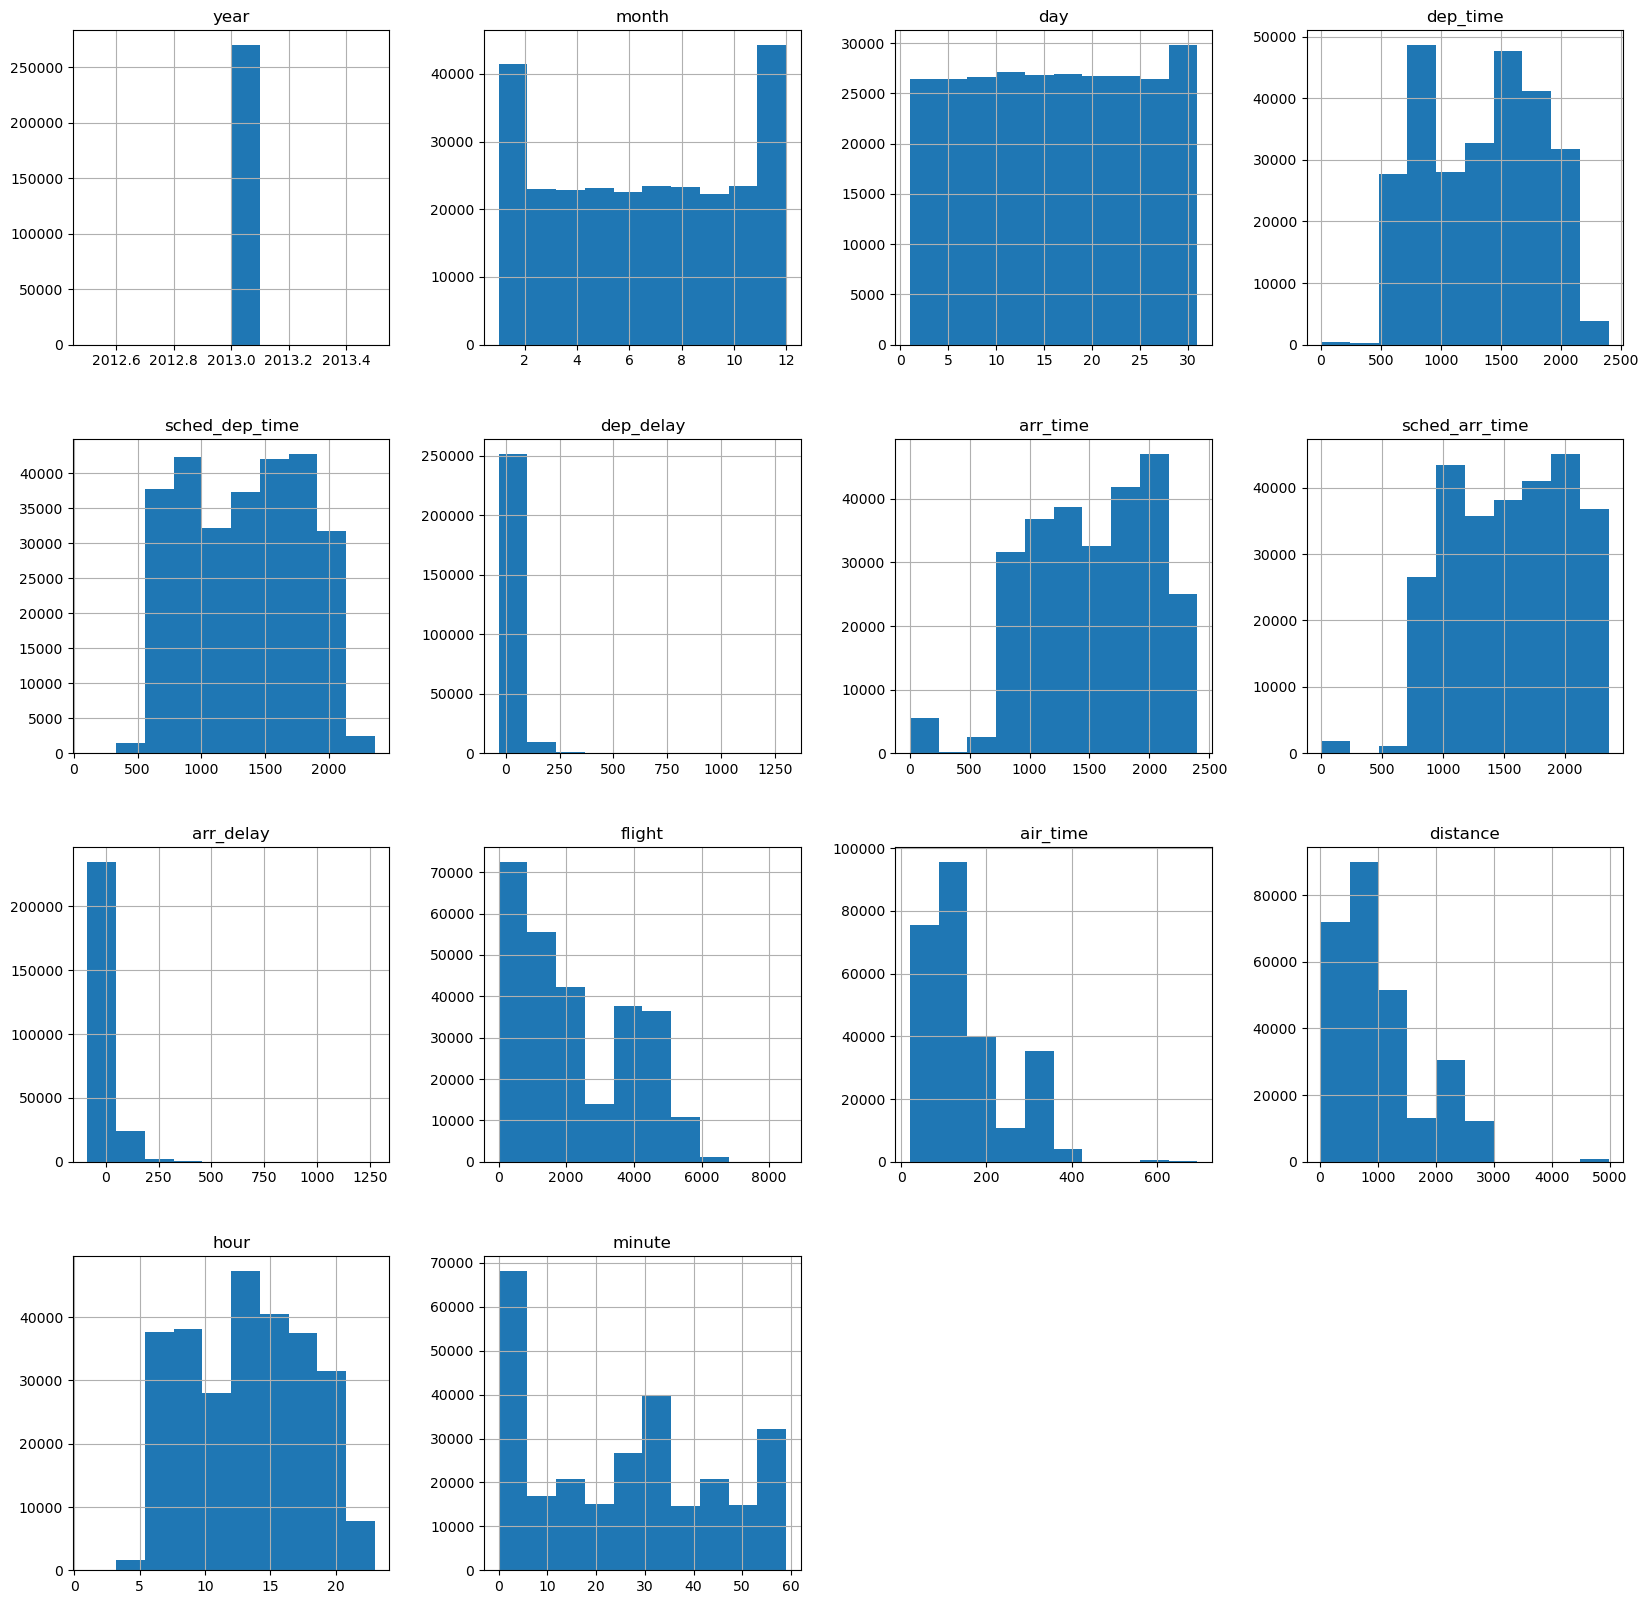

In [27]:
# The .hist() or histogram function shows the distribution for eadh of the numerical features.
# X-axis is the values in the feature and y-axis is how many or the counts.
df_flights.hist(figsize = [20, 20]);
# A few observations:
# Note on the range that the .hist() function is using for the x-values.
# The Month chart has increased flights at the beginning and end of the year, probably due to holiday season.
# The departure and arrival time starts at about 500 which implies they start at some point in the morning and is expected. 
# The distribution of air time and distance is similar. 
# We expect this to be correlated, the longer the distance the longer the air time.

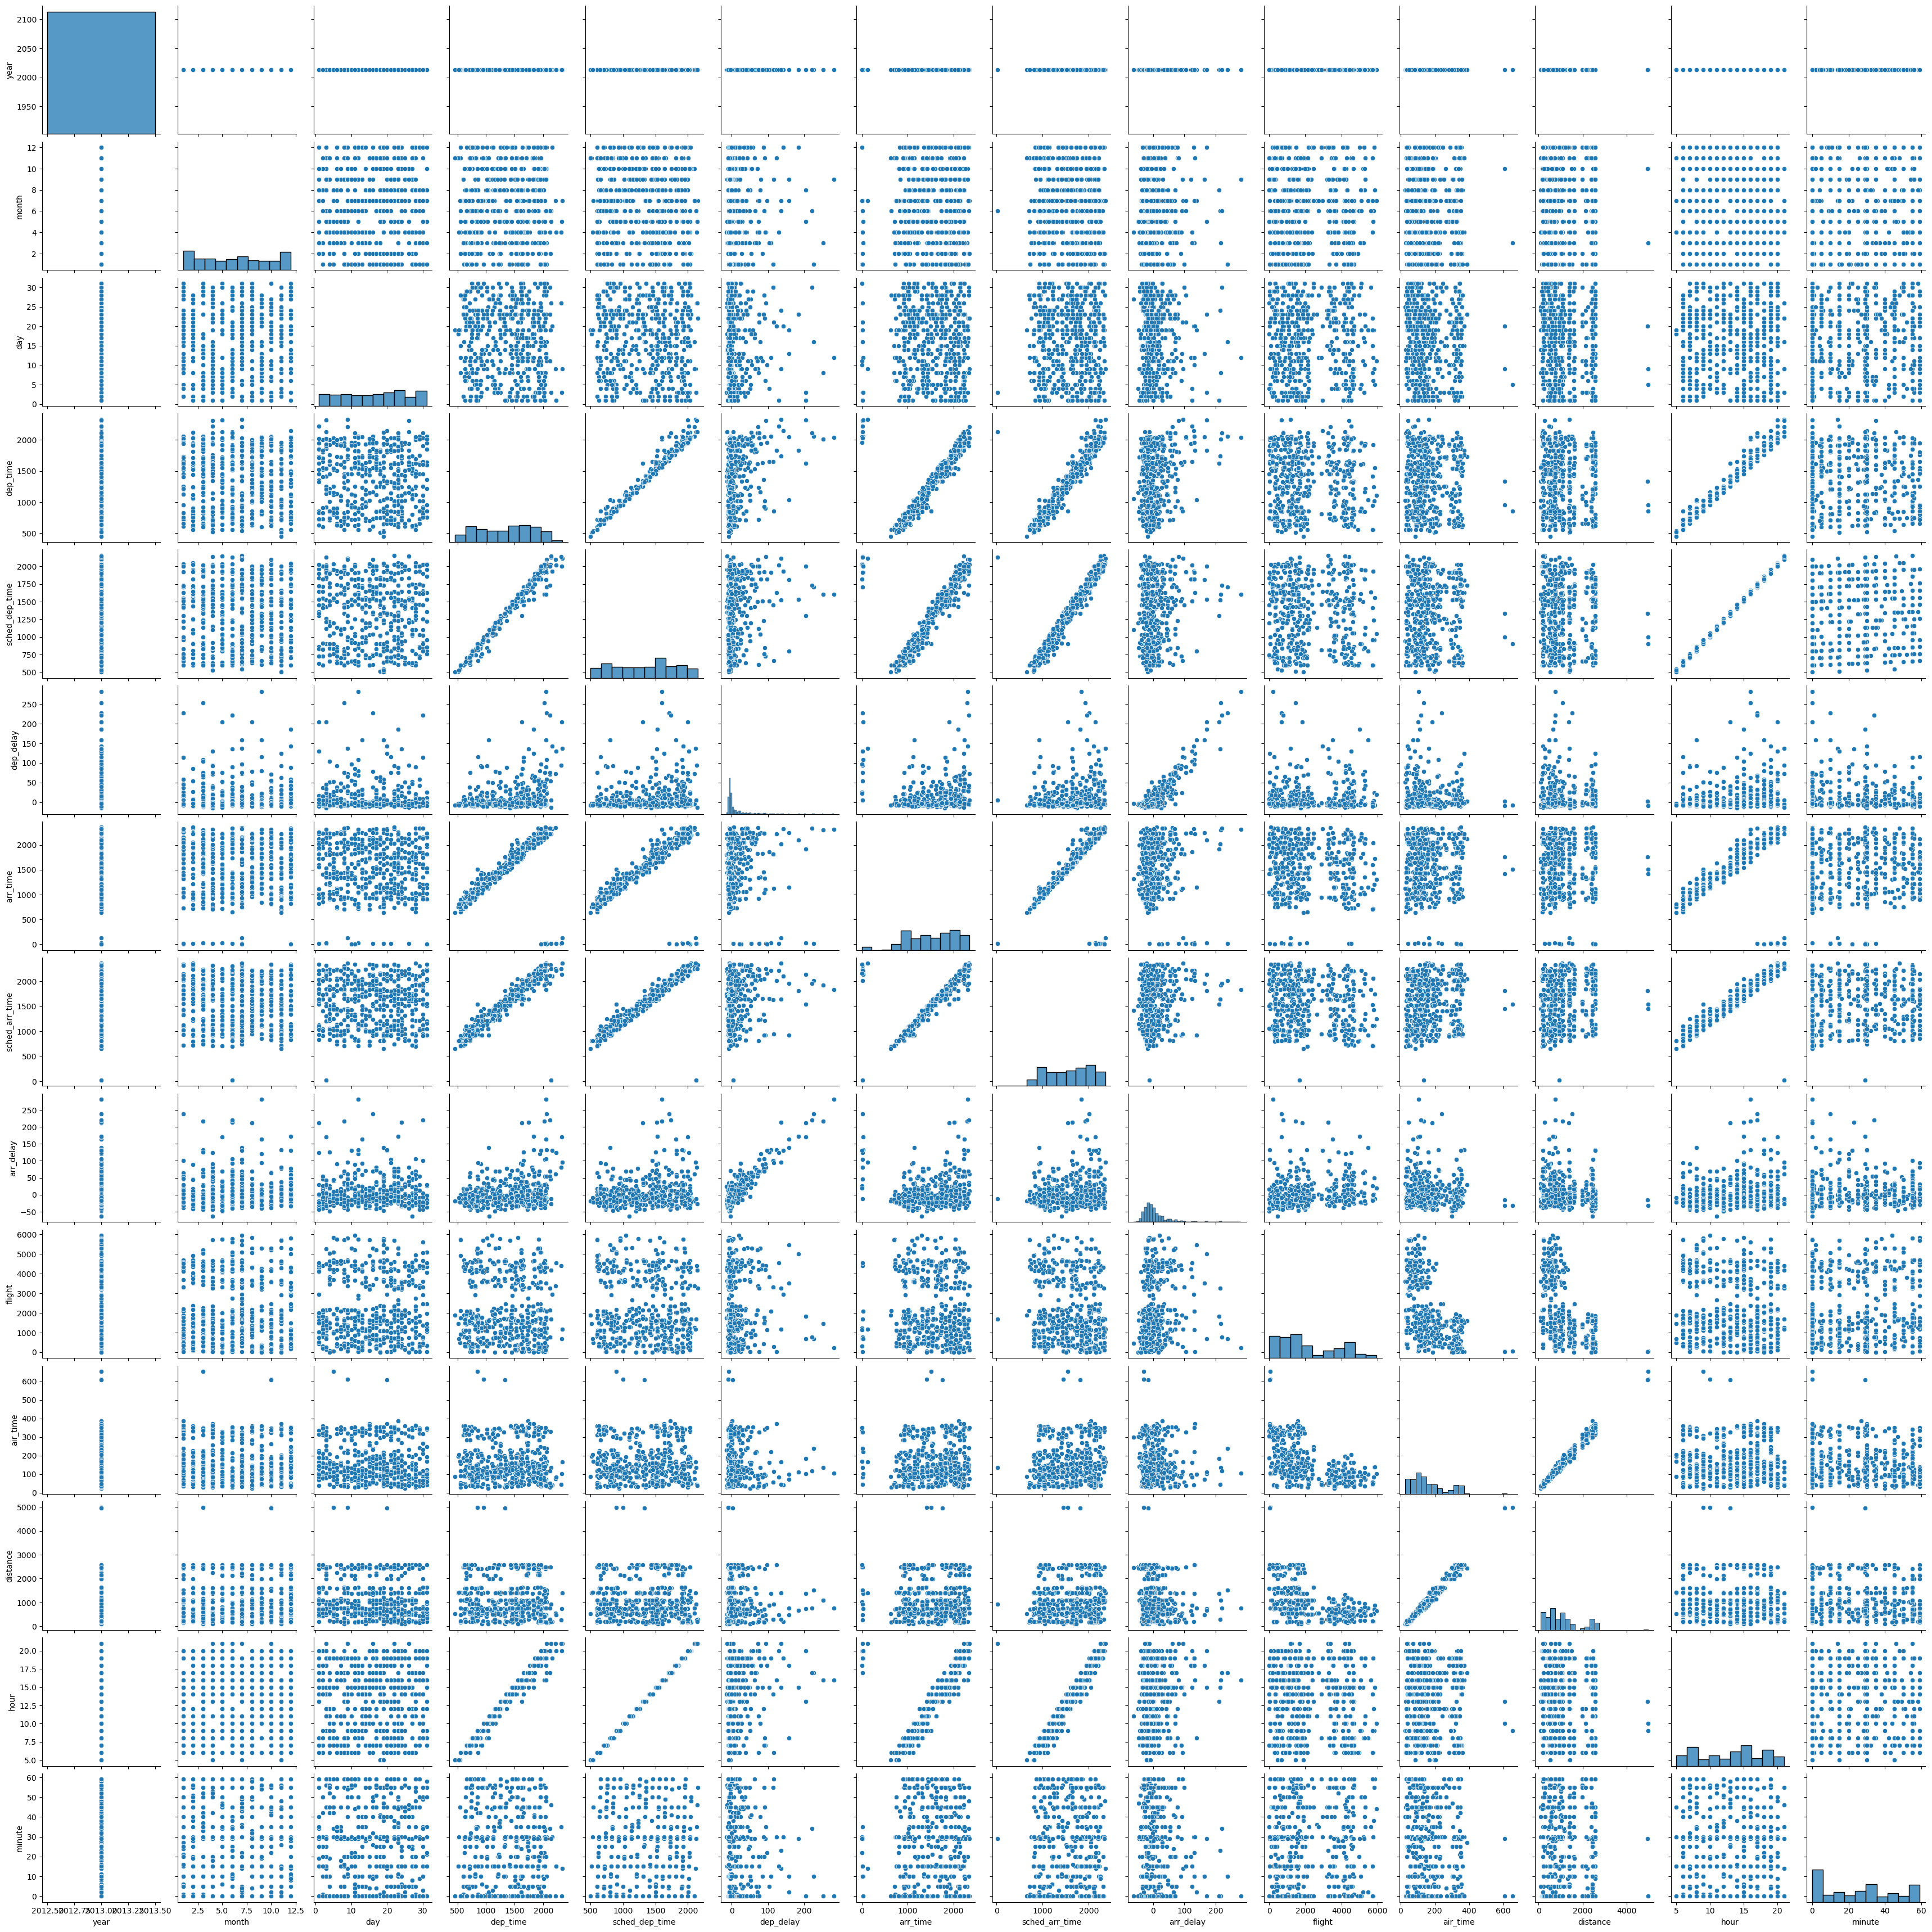

In [28]:
# The sns.pairplot() plots the relationship between any-two features. See documentation for other useful parameters.
# This can be used also for selecting which features may provide useful clusters or may be correlated.
# Note that if there are too many numerical features may be difficult to visualize. 
#sns.pairplot(df_flights); # Runs but may take a long time depending on the data.
sns.pairplot(df_flights.sample(n = 500)); # Initially is better to start with a sample of the dataframe.
# A few notes:
# Initially may be easier to evaluate the feature only on the y-axis and identify outliers.

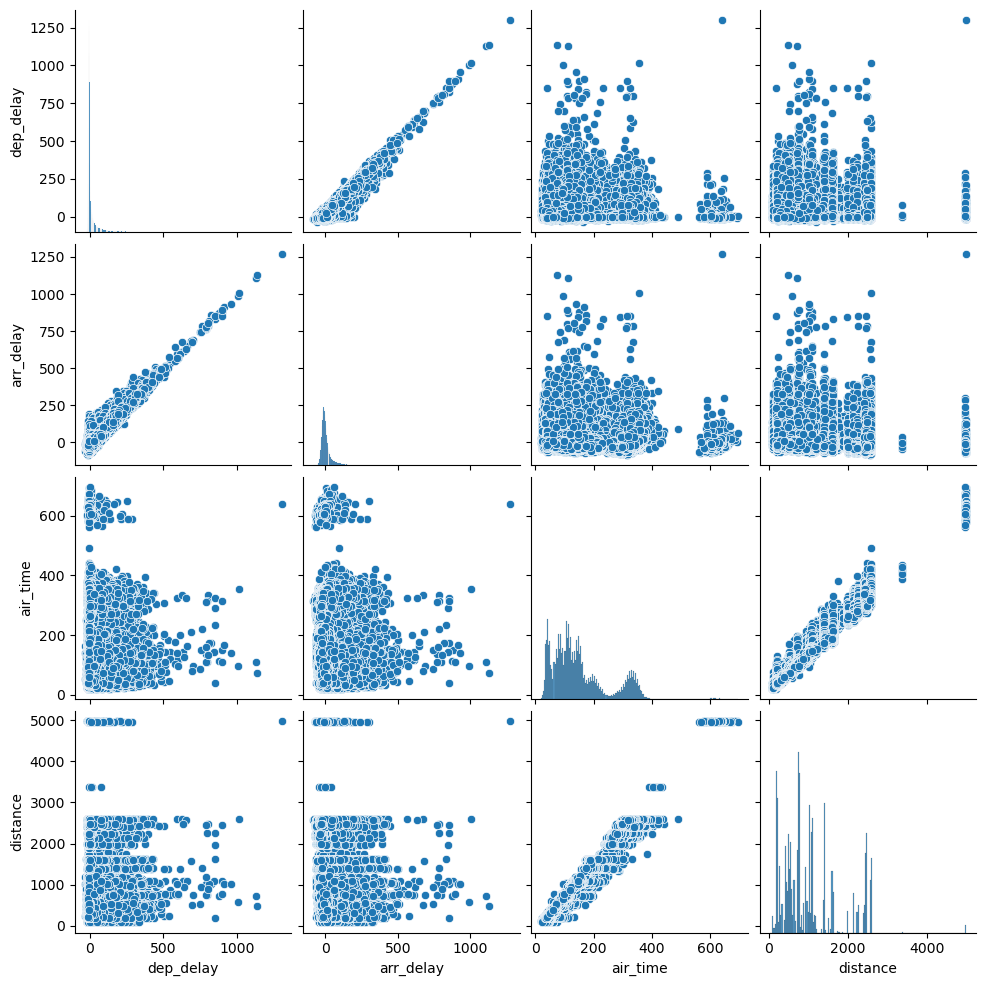

In [29]:
# Another way to make it run faster and be easier to visualize is to specify specific columns for the plots.
sns.pairplot(df_flights[['dep_delay', 'arr_delay', 'air_time', 'distance']]);

# Unique Values
[Return to Table of Contents](#Table-of-Contents)

In many cases we want to obtain the values or unique values of a column of data.

In [30]:
# DataFrame.values gives a NumPy representation of the underlying data (i.e., value for each row)
# Note that DataFrame.values does not include the index or column labels in the output
df_flights.values

array([[2013, 1, 1, ..., 5, 15, '2013-01-01T10:00:00Z'],
       [2013, 1, 1, ..., 5, 29, '2013-01-01T10:00:00Z'],
       [2013, 1, 1, ..., 5, 40, '2013-01-01T10:00:00Z'],
       ...,
       [2013, 9, 30, ..., 12, 10, '2013-09-30T16:00:00Z'],
       [2013, 9, 30, ..., 11, 59, '2013-09-30T15:00:00Z'],
       [2013, 9, 30, ..., 8, 40, '2013-09-30T12:00:00Z']], dtype=object)

In [31]:
# With numeric column.
df_flights['dep_delay'].values

array([ 2.,  4.,  2., ..., nan, nan, nan])

In [32]:
# With categorical column.
df_flights['carrier'].values

array(['UA', 'UA', 'AA', ..., 'MQ', 'MQ', 'MQ'], dtype=object)

In [33]:
# Number of unique values.
df_flights['carrier'].nunique()

14

In [34]:
# Actual unique values
df_flights['carrier'].unique()

array(['UA', 'AA', 'DL', 'EV', 'MQ', 'US', 'VX', 'FL', 'AS', '9E', 'F9',
       'HA', 'YV', 'OO'], dtype=object)

In [35]:
# If we wanted to get a list of the carriers.
carriers_list = list(df_flights['carrier'].unique())
print(carriers_list)

['UA', 'AA', 'DL', 'EV', 'MQ', 'US', 'VX', 'FL', 'AS', '9E', 'F9', 'HA', 'YV', 'OO']


# Group By
[Return to Table of Contents](#Table-of-Contents)

By “group by” we are referring to a process involving one or more of the following steps:
(a) Splitting the data into groups based on some criteria
(b) Applying a function to each group independently
(c) Combining the results into a data structure

The groupby function can be used to group by unique values and then calculate a statistic (e.g., min, max, sum, mean, counts, etc.). For example:

- min(): computes the minimum for each group's values
- max(): computes the maximum for each group's values
- sum(): computes the sum of each group's values
- mean(): computes the mean for each group
- count(): computes how many (i.e., count) for each group
- std(): computes the standard deviation for each group
- var(): computes the variance for each group
- sem(): computes the standard error of the mean for each group
- describe(): computes the descriptive statistics for each group
- size(): Compute group sizes

Documentation References:
- https://pandas.pydata.org/docs/reference/groupby.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
- https://sparkbyexamples.com/pandas/pandas-groupby-count-examples/

In [36]:
# Grouping and then applying a statistic function like the mean() function to the resulting groups.
df_flights.groupby(by = 'carrier').mean(numeric_only = True)
# However, note that the mean may not make sense in all of the columns, for example, the mean of the dates.

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
carrier,,,,,,,,,,,,,,
9E,2013.0,6.564735,15.625731,1486.526700,1471.908830,16.725769,1639.029692,1671.208559,7.379669,3567.057692,86.781601,530.235753,14.432232,28.685645
AA,2013.0,6.481683,15.693819,1297.334434,1289.909438,8.586016,1521.436757,1545.118213,0.364291,915.972318,188.822299,1340.235999,12.629808,26.928595
AS,2013.0,6.414566,15.792717,1294.561798,1284.502801,5.804775,1564.894663,1595.298319,-9.930889,12.193277,325.617772,2402.000000,12.623249,22.177871
DL,2013.0,6.574766,15.771752,1351.056155,1346.385284,9.264505,1572.877812,1595.856807,1.644341,1374.797714,173.688804,1236.901206,13.239077,22.477572
EV,2013.0,6.581304,15.683403,1368.646137,1353.544699,19.955390,1488.133734,1531.607240,15.796431,4624.082089,90.076192,562.991730,13.257287,27.816015
F9,2013.0,6.594161,15.616058,1437.832845,1407.802920,20.215543,1672.480176,1645.581022,21.920705,685.233577,229.599119,1620.000000,13.782482,29.554745
FL,2013.0,6.020552,15.681288,1386.536555,1371.741411,18.726075,1574.039610,1585.023926,20.115906,506.647239,101.143937,664.829448,13.484663,23.275153
HA,2013.0,6.274854,15.736842,948.760234,974.385965,4.900585,1474.225146,1491.549708,-6.915205,51.000000,623.087719,4983.000000,9.719298,2.456140
MQ,2013.0,6.470735,15.689169,1392.578945,1386.772967,10.552041,1550.832509,1564.162481,10.774733,3855.036784,91.180253,569.532712,13.591658,27.607152


In [37]:
# Let's pick the columns of interest were it makes sense to calculate the mean and then let's groupby and calculate mean.
df_flights[['carrier','dep_delay','arr_delay','air_time','distance']].groupby(by = 'carrier').mean()

,dep_delay,arr_delay,air_time,distance
carrier,,,,
9E,16.725769,7.379669,86.781601,530.235753
AA,8.586016,0.364291,188.822299,1340.235999
AS,5.804775,-9.930889,325.617772,2402.000000
DL,9.264505,1.644341,173.688804,1236.901206
EV,19.955390,15.796431,90.076192,562.991730
F9,20.215543,21.920705,229.599119,1620.000000
FL,18.726075,20.115906,101.143937,664.829448
HA,4.900585,-6.915205,623.087719,4983.000000
MQ,10.552041,10.774733,91.180253,569.532712


In [38]:
# With the aggregate function you can specify which mathematical statistic to apply to each column.
df_flights[['year','carrier','dep_delay','arr_delay','air_time','distance']].groupby(by = 'carrier', 
                                                                              group_keys=True).agg({'year': ['min', 'max'], 
                                                                                                    'dep_delay': ['mean', 'max'] , 
                                                                                                    'arr_delay': ['mean', 'min'],
                                                                                                    'air_time': 'sum'})

year        dep_delay          arr_delay          air_time
          min   max       mean     max       mean   min         sum
carrier                                                            
9E       2013  2013  16.725769   747.0   7.379669 -68.0   1500801.0
AA       2013  2013   8.586016  1014.0   0.364291 -75.0   6032306.0
AS       2013  2013   5.804775   225.0  -9.930889 -74.0    230863.0
DL       2013  2013   9.264505   960.0   1.644341 -71.0   8277661.0
EV       2013  2013  19.955390   548.0  15.796431 -62.0   4603614.0
F9       2013  2013  20.215543   853.0  21.920705 -47.0    156357.0
FL       2013  2013  18.726075   602.0  20.115906 -44.0    321132.0
HA       2013  2013   4.900585  1301.0  -6.915205 -70.0    213096.0
MQ       2013  2013  10.552041  1137.0  10.774733 -53.0   2282880.0
OO       2013  2013  12.586207   154.0  11.931034 -26.0      2421.0
UA       2013  2013  12.106073   483.0   3.558011 -75.0  12237728.0
US       2013  2013   3.782418   500.0   2.129595 -70.0   1756507.0
VX       2013  2013  12.869421   653.0   1.764464 -86.0   1724104.0
YV       2013  2013  18.996330   387.0  15.556985 -46.0     35763.0

In [42]:
# We can group by multiple features resulting in a multiindex series. 
# Using the .reset_index() changes the multiindes series output to a single index dataframe.
multiple_grouped = df_flights.groupby(['origin', 'dest']).dep_delay.mean()
multiple_grouped

origin  dest
EWR     ALB     23.620525
        ANC     12.875000
        ATL     15.501738
        AUS     14.915663
        AVL      8.616601
                  ...    
LGA     SYR     19.110701
        TPA      9.925267
        TVC     23.410959
        TYS     12.705660
        XNA      5.933793
Name: dep_delay, Length: 206, dtype: float64

In [43]:
multiple_grouped[('EWR', 'AUS')] # Note that this slice works with the multiindex series but not with dataframe.

14.91566265060241

In [47]:
multiple_grouped.reset_index().head(3)

,origin,dest,dep_delay
0,EWR,ALB,23.620525
1,EWR,ANC,12.875000
2,EWR,ATL,15.501738


#### Aggregation by User Defined Function
Besides using built-in functions from other libraries (especially from numpy) we can also use the aggregation with our own defined functions.

In [49]:
# define my_avg_funct
def my_avg_cost(x):
    return x.mean()*20.0

In [50]:
# let's use my_avg_func instead of 'mean'
grouped_by_dest = df_flights.groupby('dest').agg(flight_counts = ('dest', 'count'), 
                                              delay_mean= ('dep_delay', 'mean'), 
                                              average_cost = ('distance', my_avg_cost)
                                             )
grouped_by_dest.head()

,flight_counts,delay_mean,average_cost
dest,,,
ALB,439,23.620525,2860.000000
ANC,8,12.875000,67400.000000
ATL,17156,12.544834,15141.827932
AUS,1394,13.957941,30256.585366
AVL,275,8.190114,11671.636364


# Categorical Data
[Return to Table of Contents](#Table-of-Contents)

Categorical data can be represented in one-hot-encoded/dummy format. In this format each category has a respective column and if the category is true it has a 1 and if false has a 0. This is especially very useful when you can have multiple categories. 

It is important to note the dummy variable trap in machine learning. In order to use the dummy data in machine learning the number of dummy variables that we need to create has to be n-1 where n is the number of different values that the categorical value can have. For example, if we had a column on gender the number of dummy variables that we should create is 1. That is either Male (with values 0 or 1) or Female (with values 0 or 1). If we create a dummy column for both Male and Female both columns will be perfectly correlated as a person can be either Male or Female but not both.

Documentation References:
- https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
- https://pandas.pydata.org/docs/reference/api/pandas.from_dummies.html
- https://en.wikipedia.org/wiki/Dummy_variable_(statistics)

#### Example 1:
If we want to convert the carriers to dummy-variables we can do the following. Note that this is a new dataframe which matches the indexes of the df_flights dataframes.

In [51]:
df_flights_carrier_dummy = pd.get_dummies(df_flights['carrier'])
df_flights_carrier_dummy.head()
# If we wanted to combine this dataframe with the previous df_flights,
# we could use the concat or merge functions we discussed in the previous Pandas notebook.
# Note that it would merge based on index.
# If we had performed a filter in df_flights dataframe and not reset the index this new dataframe indexes will not match.

,9E,AA,AS,DL,EV,F9,FL,HA,MQ,OO,UA,US,VX,YV
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [53]:
pd.from_dummies(df_flights_carrier_dummy) # Converts back to categorical. 

,
0,UA
1,UA
2,AA
3,DL
4,UA
...,...
269861,9E
269862,9E
269863,MQ
269864,MQ


#### Example 2:
Using the names dataframe.

In [54]:
df_names = pd.read_csv('./input_data/df_names.csv')
df_names.head()

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender
0,Victor,Kramer,1956-01-04,10000,530.0,55000,M
1,Katherine,Newcomb,1996-05-03,5000,453.0,101000,F
2,Carolyn,Dias,2011-12-23,0,800.0,0,F
3,Ruth,Ohare,1975-03-26,25000,781.0,124000,F
4,Derek,Raynes,2001-11-27,17000,702.0,85000,M


In [55]:
df_names_gender_dummy = pd.get_dummies(df_names['gender'])
df_names_gender_dummy

,F,M
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1


In [56]:
pd.from_dummies(df_names_gender_dummy) # Converts back to categorical. 

,
0,M
1,F
2,F
3,F
4,M
5,M


In [ ]:
# If we wanted to convert back to categorical we could loop thru all the columns.
# When the value is 1 we add the column name.
# At the end of the columns we append all that were true (in this case is only one) and add it to a new column.

In [57]:
%%time
# %%time is a magic command to measure time cell takes to run.
# To convert from one-hot-encoded to categorical. 
# This code creates a combined column for all one-hot-encoded values that are true.

# Number of columns before adding the category column.
dummy_cols_number = df_names_gender_dummy.shape[1]

for i in range(len(df_names_gender_dummy)): # Iterates thru the rows.     
    column = 0 # First Dummy Column starts at 0.
    cat_value = str('') # Sets starting value of cat_value as a empty string.
    
    while column < dummy_cols_number: # Iterates thru the columns.
        if df_names_gender_dummy.iat[i, column] == 1: # If the value is 1 adds the column name to the cat_value.
            cat_value = str(cat_value) + str(df_names_gender_dummy.columns[column])
            column += 1
        else:
            column += 1
    
    df_names_gender_dummy.at[i, 'gender_cat'] = cat_value

CPU times: total: 0 ns
Wall time: 991 µs


Note: If using the above loops in the df_flights_carrier data, it would be iterating thru 336,776 values which may take awhile. It may also make sense to implement a progress bar. For large datasets the loop may not be the best approach.

In [58]:
df_names_gender_dummy.head(10)

,F,M,gender_cat
0,0,1,M
1,1,0,F
2,1,0,F
3,1,0,F
4,0,1,M
5,0,1,M


# Pivot Table
[Return to Table of Contents](#Table-of-Contents)

Create a spreadsheet-style pivot table as a DataFrame. The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame.

Documentation Reference:
- https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

#### Example 2

Let's say we have number of sales for two different products (D and E) at four different stores by three different managers we divide number of sales in two groups: the ones made in week days (M-F) and the ones made in weekends (SS) managers work either in week days or in weekends but not both.

In [59]:
df_sales = pd.DataFrame({'A': ['Store-1', 'Store-2', 'Store-3', 'Store-4'] * 3,
                   'B': ['Manager-1', 'Manager-2', 'Manager-3'] * 4,
                   'C': ['M-F', 'M-F', 'M-F', 'SS', 'SS', 'SS'] * 2,
                   'D': np.random.randint(1,13,12),
                   'E': np.random.randint(1,31,12)})
df_sales

,A,B,C,D,E
0,Store-1,Manager-1,M-F,11,3
1,Store-2,Manager-2,M-F,8,3
2,Store-3,Manager-3,M-F,4,27
3,Store-4,Manager-1,SS,8,28
4,Store-1,Manager-2,SS,9,2
5,Store-2,Manager-3,SS,11,18
6,Store-3,Manager-1,M-F,4,26
7,Store-4,Manager-2,M-F,1,13
8,Store-1,Manager-3,M-F,7,9
9,Store-2,Manager-1,SS,6,15


In [60]:
# We can produce pivot tables from this data very easily:
# Let's see which manager sold how many "product Ds" in each store
pd.pivot_table(df_sales, values='D', index=['A', 'B'], columns=['C'],  aggfunc = 'mean')

C                   M-F    SS
A       B                    
Store-1 Manager-1  11.0   NaN
        Manager-2   NaN   9.0
        Manager-3   7.0   NaN
Store-2 Manager-1   NaN   6.0
        Manager-2   8.0   NaN
        Manager-3   NaN  11.0
Store-3 Manager-1   4.0   NaN
        Manager-2   NaN   4.0
        Manager-3   4.0   NaN
Store-4 Manager-1   NaN   8.0
        Manager-2   1.0   NaN
        Manager-3   NaN   6.0

#### Example 2
Let's say we have number of people as functions of blood type (e.g., RH+ or -) in three towns.

In [61]:
df_blood = pd.DataFrame({
    'Type': np.repeat(np.asarray(['A', 'B', 'AB','0']).T, 4, axis=0),
    'RH': [1,-1]*8,
    'M/F': ['Male','Male','Female','Female']*4,
    'D': np.random.randint(10000,20000,16)})

In [62]:
df_blood

,Type,RH,M/F,D
0,A,1,Male,19481
1,A,-1,Male,14617
2,A,1,Female,12970
3,A,-1,Female,17402
4,B,1,Male,10546
5,B,-1,Male,10435
6,B,1,Female,11187
7,B,-1,Female,17162
8,AB,1,Male,19418
9,AB,-1,Male,18470


In [63]:
# Let's find out the total number of people 
pd.pivot_table(df_blood,values='D', 
               index = ['Type','RH'], 
               columns=['M/F'])

M/F      Female   Male
Type RH               
0    -1   19461  17967
      1   12203  14121
A    -1   17402  14617
      1   12970  19481
AB   -1   12224  18470
      1   10677  19418
B    -1   17162  10435
      1   11187  10546

# Melt Function
[Return to Table of Contents](#Table-of-Contents)

This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.

Documentation Reference:
- https://pandas.pydata.org/docs/reference/api/pandas.melt.html

#### Example:

Let's assume the dataframe below shows the performance of devices and properties (width, length, and thickness) in the last two columns. How can we transform this dataframe so that it will list the performance of all devices in the following format: width, length, thickness, and performance.

In [64]:
df_device = pd.DataFrame({'Width': {1: 11, 2: 12, 3: 15},
                   'Length': {1: 1, 2: 3, 3: 5},
                   'Thick_1m': {1: 2, 2: 4, 3: 6},
                   'Thick_2m': {1: 2.5, 2: 4.1, 3: 6.2}})
df_device

,Width,Length,Thick_1m,Thick_2m
1,11,1,2,2.5
2,12,3,4,4.1
3,15,5,6,6.2


In [65]:
# For this transformation, we need "MELT"
df_device_2 = df_device.melt(id_vars=["Width", "Length"], 
                      var_name="Thickness", 
                      value_name="performance").dropna().copy()
df_device_2

,Width,Length,Thickness,performance
0,11,1,Thick_1m,2.0
1,12,3,Thick_1m,4.0
2,15,5,Thick_1m,6.0
3,11,1,Thick_2m,2.5
4,12,3,Thick_2m,4.1
5,15,5,Thick_2m,6.2


In [66]:
df_device_2["Thickness"] = df_device_2["Thickness"].str.replace("Thick_","")
df_device_2["Thickness"] = df_device_2["Thickness"].str.replace("m","").astype(float)
df_device_2

,Width,Length,Thickness,performance
0,11,1,1.0,2.0
1,12,3,1.0,4.0
2,15,5,1.0,6.0
3,11,1,2.0,2.5
4,12,3,2.0,4.1
5,15,5,2.0,6.2


# Shift Index/Data
[Return to Table of Contents](#Table-of-Contents)

Shift index by desired number of periods with an optional time freq. When freq is not passed, shift the index without realigning the data. If freq is passed (in this case, the index must be date or datetime, or it will raise a NotImplementedError), the index will be increased using the periods and the freq. freq can be inferred when specified as “infer” as long as either freq or inferred_freq attribute is set in the index.

Documentation Reference:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html

In [67]:
# Operating with objects that have different dimensionality and need alignment. 
# In addition, pandas automatically broadcasts along the specified dimension.
dates = pd.date_range('20220101', periods=6)
dates

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06'],
              dtype='datetime64[ns]', freq='D')

In [70]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2022-01-01    NaN
2022-01-02    NaN
2022-01-03    1.0
2022-01-04    3.0
2022-01-05    5.0
2022-01-06    NaN
Freq: D, dtype: float64

Above, when we shift index, 1st of month becomes 3rd, 2nd becomes 4th, etc. However, since we don't have 7th and 8th in our index, when they are shifted, 1st and 2nd elements become NaN value of 6 and 8 are discarded.

# NOTEBOOK END